In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv("/content/shampoo_sales.csv")
data

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


In [ ]:
missing_values = data['Sales'].isnull()
print(missing_values)
missing_values_month = data['Month'].isnull()
print(missing_values_month)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
Name: Sales, dtype: bool
0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
Name: Month, dtype: bool


In [ ]:
data['month']=pd.factorize(data.Month)[0]
data

,Month,Sales,month
0,1-01,266.0,0
1,1-02,145.9,1
2,1-03,183.1,2
3,1-04,119.3,3
4,1-05,180.3,4
5,1-06,168.5,5
6,1-07,231.8,6
7,1-08,224.5,7
8,1-09,192.8,8
9,1-10,122.9,9


In [ ]:
x = data.drop(columns='Month', axis = 1)


In [ ]:
print(x)

    Sales  month
0   266.0      0
1   145.9      1
2   183.1      2
3   119.3      3
4   180.3      4
5   168.5      5
6   231.8      6
7   224.5      7
8   192.8      8
9   122.9      9
10  336.5     10
11  185.9     11
12  194.3     12
13  149.5     13
14  210.1     14
15  273.3     15
16  191.4     16
17  287.0     17
18  226.0     18
19  303.6     19
20  289.9     20
21  421.6     21
22  264.5     22
23  342.3     23
24  339.7     24
25  440.4     25
26  315.9     26
27  439.3     27
28  401.3     28
29  437.4     29
30  575.5     30
31  407.6     31
32  682.0     32
33  475.3     33
34  581.3     34
35  646.9     35


In [ ]:
#number of points and features
x.shape

(36, 2)

In [ ]:
data.describe()

,Sales,month
count,36.000000,36.000000
mean,312.600000,17.500000
std,148.937164,10.535654
min,119.300000,0.000000
25%,192.450000,8.750000
50%,280.150000,17.500000
75%,411.100000,26.250000
max,682.000000,35.000000


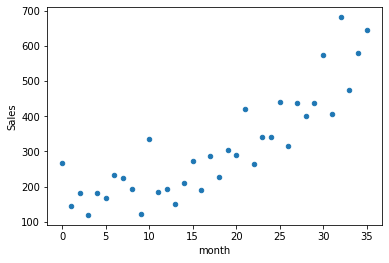

In [ ]:
x.plot(kind='scatter',x='month',y='Sales')
plt.show()

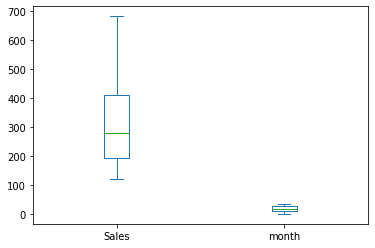

In [ ]:
x.plot(kind='box')
plt.show()

In [ ]:
x.corr() #get correlation coeff

,Sales,month
Sales,1.000000,0.854461
month,0.854461,1.000000


In [ ]:
mm=pd.DataFrame(data['month'])
Sale=pd.DataFrame(data['Sales'])

In [ ]:
mm

,month
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [ ]:
Sale

,Sales
0,266.0
1,145.9
2,183.1
3,119.3
4,180.3
5,168.5
6,231.8
7,224.5
8,192.8
9,122.9


In [ ]:
lm=LinearRegression()

In [ ]:
model=lm.fit(mm,Sale)

In [ ]:
model.coef_

array([[12.07907336]])

In [ ]:
model.intercept_

array([101.21621622])

In [ ]:
model.score(mm,Sale)

0.7301028704508052

In [ ]:
X=([50,60,70])
X=pd.DataFrame(X)
Y=model.predict(X)
Y=pd.DataFrame(Y)
df=pd.concat([X,Y],axis=1,keys=['months_new','Sales_predicted'])
df

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


,months_new,Sales_predicted
,0,0
0,50,705.169884
1,60,825.960618
2,70,946.751351


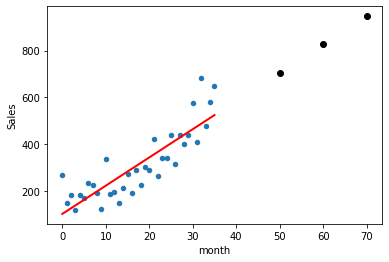

In [ ]:
x.plot(kind='scatter',x='month',y='Sales')
plt.plot(mm,model.predict(mm),color='red',linewidth=2)
plt.scatter(X,Y ,color='black')
plt.show()